
Урок 1. Алгоритм линейной регрессии. Градиентный спуск

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
import warnings
warnings.simplefilter('ignore')

In [20]:
X = np.array([[1, 1, 1, 1, 1,
               1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 
               0, 5, 10, 1, 2]]).T

In [21]:
X  # <- матрица "объекты-признаки" ([x0, x1])

array([[ 1,  1],
       [ 1,  1],
       [ 1,  2],
       [ 1,  1],
       [ 1,  3],
       [ 1,  0],
       [ 1,  5],
       [ 1, 10],
       [ 1,  1],
       [ 1,  2]])

In [22]:
X.shape

(10, 2)

In [23]:
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

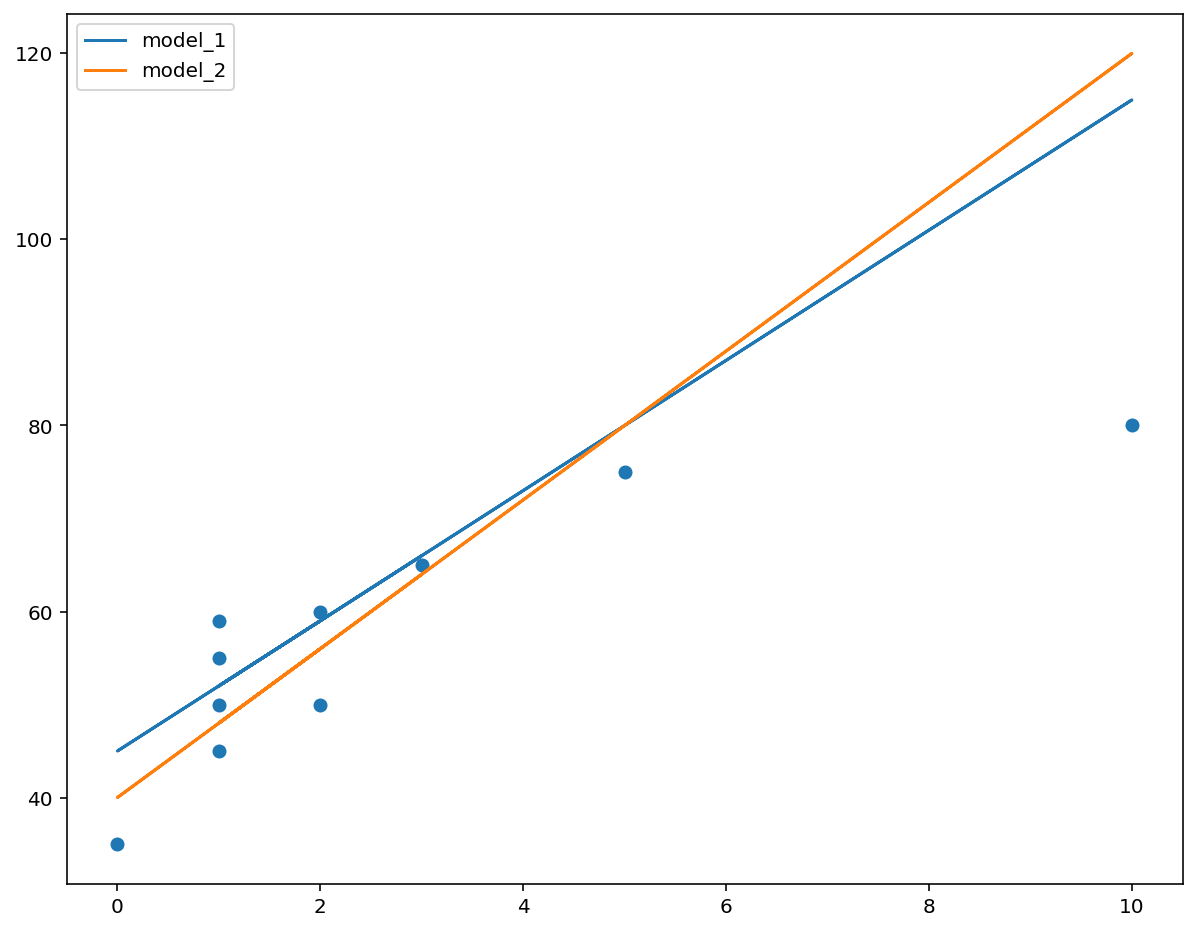

In [24]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:,1], y)
plt.plot(X[:,1], 45*np.ones(10) + X[:,1]*7, label='model_1')
plt.plot(X[:,1], 40*np.ones(10) + X[:,1]*8, label='model_2')
plt.legend();

In [25]:
y_pred1 = 45*np.ones(10) + X[:,1]*7
y_pred2 = 40*np.ones(10) + X[:,1]*8

In [26]:
y_pred2

array([ 48.,  48.,  56.,  48.,  64.,  40.,  80., 120.,  48.,  56.])

In [27]:
y

[45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [28]:
err1 = np.sum(y - y_pred1)
err2 = np.sum(y - y_pred2)
print(f'Разность прогнозов наших моделей: {err1}, {err2}')

Разность прогнозов наших моделей: -58.0, -34.0


In [29]:
mae_1 = np.sum(np.abs(y - y_pred1))/len(y)
mae_2 = np.sum(np.abs(y - y_pred2))/len(y)
print(f'MAE наших моделей: {mae_1}, {mae_2}')

MAE наших моделей: 8.0, 8.4


In [30]:
def calc_mae(y, y_pred):
    return np.mean(np.abs(y - y_pred))

In [31]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
print(f'MSE наших моделей: {mse_1}, {mse_2}')

MSE наших моделей: 154.4, 188.6


In [55]:
def calc_mse(y, y_pred):
    return np.mean((y - y_pred)**2)

In [56]:
rmse_1 = np.sqrt(np.mean((y - y_pred1)**2))
rmse_2 = np.sqrt(np.mean((y - y_pred2)**2))
print(f'MSE наших моделей: {rmse_1}, {rmse_2}')

MSE наших моделей: 12.425779653607254, 13.733171520082315


In [57]:
def calc_r2(y, y_pred):
    return 1 - np.mean((y - y_pred)**2) / np.mean((y - np.mean(y))**2)

In [58]:
r2_1 = calc_r2(y, y_pred1)
r2_2 = calc_r2(y, y_pred2)
print(f'R2 наших моделей: {r2_1}, {r2_2}')

R2 наших моделей: 0.06898215147129749, -0.13724071394114823


In [59]:
W = np.linalg.inv(np.dot(X.T, X)) @ X.T @ y
print(W)

[47.23214286  3.91071429]


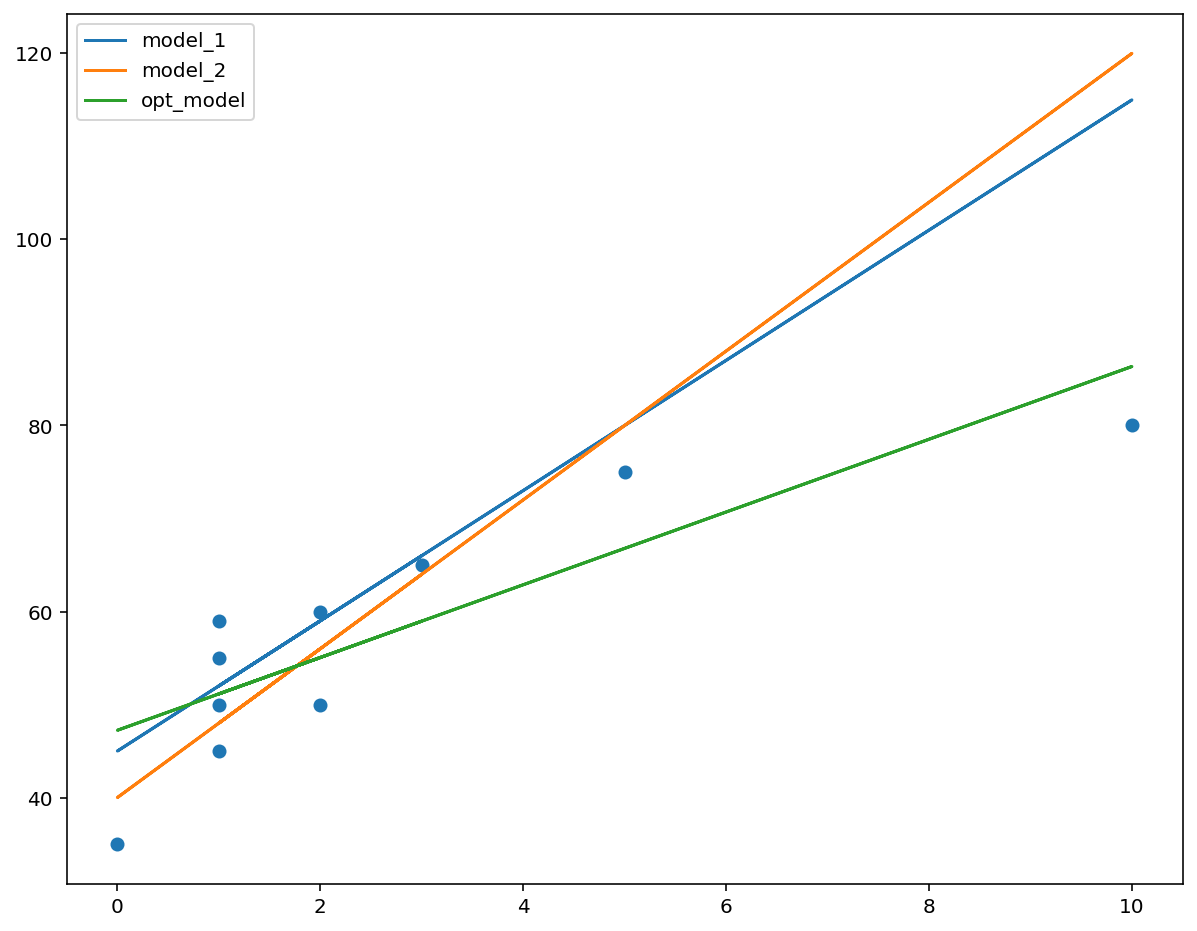

In [60]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:,1], y)
plt.plot(X[:,1], 45*np.ones(10) + X[:,1]*7, label='model_1')
plt.plot(X[:,1], 40*np.ones(10) + X[:,1]*8, label='model_2')
plt.plot(X[:,1], W[0] + W[1] * X[:,1], label='opt_model')
plt.legend();

In [62]:
# метрики качества предыдущих моделей:
calc_mse(y, y_pred1)

154.4

In [63]:
calc_mae(y, y_pred1)

8.0

In [64]:
y_pred3 = W[0] + W[1]*X[:,1]
y_pred3

array([51.14285714, 51.14285714, 55.05357143, 51.14285714, 58.96428571,
       47.23214286, 66.78571429, 86.33928571, 51.14285714, 55.05357143])

In [65]:
calc_mae(y, y_pred3)

6.182142857142858

In [66]:
W = np.array([0.01, 0.1])

In [67]:
y_pred = np.dot(X, W)
y_pred

array([0.11, 0.11, 0.21, 0.11, 0.31, 0.01, 0.51, 1.01, 0.11, 0.21])

In [68]:
calc_mse(y, y_pred)

3423.6233

In [69]:
lr = 0.01

In [70]:
grad_0 = (1/len(y))*lr*(2*np.sum(X[:,0]*(W[0]*X[:,0] - y)))
grad_1 = (1/len(y))*lr*(2*np.sum(X[:,1]*(W[1]*X[:,1] - y)))

In [71]:
W[0] = W[0] - grad_0; W[0]

1.1578

In [72]:
W[1] = W[1] - grad_1; W[1]

3.6688

In [73]:
y_pred = np.dot(X, W)
y_pred

array([ 4.8266,  4.8266,  8.4954,  4.8266, 12.1642,  1.1578, 19.5018,
       37.8458,  4.8266,  8.4954])

In [74]:
calc_mse(y, y_pred)

2227.5964155919996

Домашнее задание:
Подберите скорость обучения (lr) и количество итераций (epoch):

In [75]:
n = X.shape[1]
epoch = 400
lr = 0.01
W = np.array([1, 0.5])
W, lr

(array([1. , 0.5]), 0.01)

In [76]:
for i in range(1, epoch+1):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    for j in range(W.shape[0]):
        W[j] -= lr * (1/n * 2 * np.sum(X[:,j] * (y_pred - y)))
    if i % 100 == 0:
        print(f'# итерация: {i}, MSE: {err}, веса: {W}')

# итерация: 100, MSE: 45.964314596488876, веса: [47.02042266  3.94981004]
# итерация: 200, MSE: 45.937500618081245, веса: [47.23112638  3.91090199]
# итерация: 300, MSE: 45.93750000001424, веса: [47.23213798  3.91071519]
# итерация: 400, MSE: 45.93749999999998, веса: [47.23214283  3.91071429]


In [77]:
# при lr = 0.01 достаточно 400 итераций (epoch) для получения результата с MSE = 45.9375

In [78]:
n = X.shape[1]
epoch = 400
lr = 0.01
W = np.array([1, 0.5])
W, lr

(array([1. , 0.5]), 0.01)

In [79]:
for i in range(1, epoch+1):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
#     for j in range(W.shape[0]):
#         W[j] -= lr * (1/n * 2 * np.sum(X[:, j] * (y_pred - y)))
    W -= (lr * (1/n * 2 * np.sum(X * (y_pred - y).reshape(X.shape[0], -1), axis=0)))
    if i % 100 == 0:
        print(f'# итерация: {i}, MSE: {err}, веса: {W}')

# итерация: 100, MSE: 45.964314596488876, веса: [47.02042266  3.94981004]
# итерация: 200, MSE: 45.937500618081245, веса: [47.23112638  3.91090199]
# итерация: 300, MSE: 45.93750000001424, веса: [47.23213798  3.91071519]
# итерация: 400, MSE: 45.93749999999998, веса: [47.23214283  3.91071429]


**3: вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога (упрощенный аналог параметра tol в линейной регрессии в sklearn).

In [80]:
n = X.shape[1]
tol = 0.0001
lr = 0.01
W = np.array([1, 0.5])
W, lr

(array([1. , 0.5]), 0.01)

In [81]:
i = 1
while True:
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    if i > 1:
        if abs(err - err_prev) < tol:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
            break
    for j in range(W.shape[0]):
        W[j] -= lr * (1/n * 2 * np.sum(X[:,j] * (y_pred - y)))
    if i % 100 == 0:
        print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    err_prev = err
    i += 1

# итерация: 100, MSE: 45.964314596488876, веса: [47.02042266  3.94981004]
# итерация: 132, MSE: 45.938379887287674, веса: [47.19168743  3.91818469]


In [82]:
# при пороге изменения ошибки (tol) ниже 0.0001 получаем результат MSE = 45.9384 за 132 итерации

In [83]:
n = X.shape[1]
tol = 0.0001
lr = 0.01
W = np.array([1, 0.5])
W, lr

(array([1. , 0.5]), 0.01)

In [84]:
i = 1
while True:
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    if i > 1:
        if abs(err - err_prev) < tol:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
            break
#     for j in range(W.shape[0]):
#         W[j] -= lr * (1/n * 2 * np.sum(X[:, j] * (y_pred - y)))
    W -= (lr * (1/n * 2 * np.sum(X * (y_pred - y).reshape(X.shape[0], -1), axis=0)))
    if i % 100 == 0:
        print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    err_prev = err
    i += 1

# итерация: 100, MSE: 45.964314596488876, веса: [47.02042266  3.94981004]
# итерация: 132, MSE: 45.938379887287674, веса: [47.19168743  3.91818469]
